<a href="https://colab.research.google.com/github/hrutuja483/Weather-Data-/blob/main/Weather_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Set color scheme
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#A16F86'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)


In [3]:
# Data loading and initial review¶
# Data downloading
df = pd.read_csv('Weather Data.csv')

In [4]:
# Dataset array dimension
df.shape

(8784, 8)

In [5]:
# Basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# The first five rows of the data set
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
# The last five rows of the data set
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [8]:
# Data reorganization and cleansing
# Rename columns
df.columns = ['Datetime', 'Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]', 'Weather']

# Convert time stamp column to time format
df.index = pd.to_datetime(df['Datetime']).dt.floor('T')
df = df.iloc[:, 1:]

# Remove empty rows (if any are present in the data).
df.drop(df[df.isnull().any(axis = 1)].index, inplace = True)

# Remove duplicates (if any are present in the dataset).
df.drop_duplicates(inplace = True)

# Separate 'Weather' column into three separate parts (each description of weather conditions in a separate column)
weather_split = ['Weather - p. 1', 'Weather - p. 2', 'Weather - p. 3']
df[weather_split] = df['Weather'].str.split(',', expand = True)

# Remove 'Weather' column (redundant).
df.drop(['Weather'], axis = 1, inplace = True)

# Storage of data on weather conditions according to zero-one coding.
weather_category_list = np.array([])

for column in df[weather_split]:
    weather_category_list = np.append(weather_category_list, df[weather_split][column].unique())

weather_category_list = weather_category_list[weather_category_list != None]
weather_category_list = np.unique(weather_category_list)

df[weather_category_list] = 0

for column in df[weather_split]:
    for index in df[weather_split].index:
        if df.loc[index, column] != None:
            df.at[index, df.loc[index, column]] = df.loc[index, df.loc[index, column]] + 1

# Delete 'Weather - p. 1', 'Weather - p. 2' and 'Weather - p. 3' columns (redundant)
df.drop(weather_split, axis = 1, inplace = True)

# Create an auxiliary set of column names in measured values
weather_measurement_data = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']

In [9]:
# Display the dataset in tabular form (data after correction and formatting) - first records
df.head(5)

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Display of data frame information (data after correction and formatting).
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp [C]               8784 non-null   float64
 1   Dew Point Temp [C]     8784 non-null   float64
 2   Rel Hum [%]            8784 non-null   int64  
 3   Wind Speed [km/h]      8784 non-null   int64  
 4   Visibility [km]        8784 non-null   float64
 5   Press [kPa]            8784 non-null   float64
 6   Blowing Snow           8784 non-null   int64  
 7   Clear                  8784 non-null   int64  
 8   Cloudy                 8784 non-null   int64  
 9   Drizzle                8784 non-null   int64  
 10  Fog                    8784 non-null   int64  
 11  Freezing Drizzle       8784 non-null   int64  
 12  Freezing Fog           8784 non-null   int64  
 13  Freezing Rain          8784 non-null   int64  
 14  Haze                

In [11]:
# Display a statistical summary for selected columns
df[weather_measurement_data].describe()

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa]
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


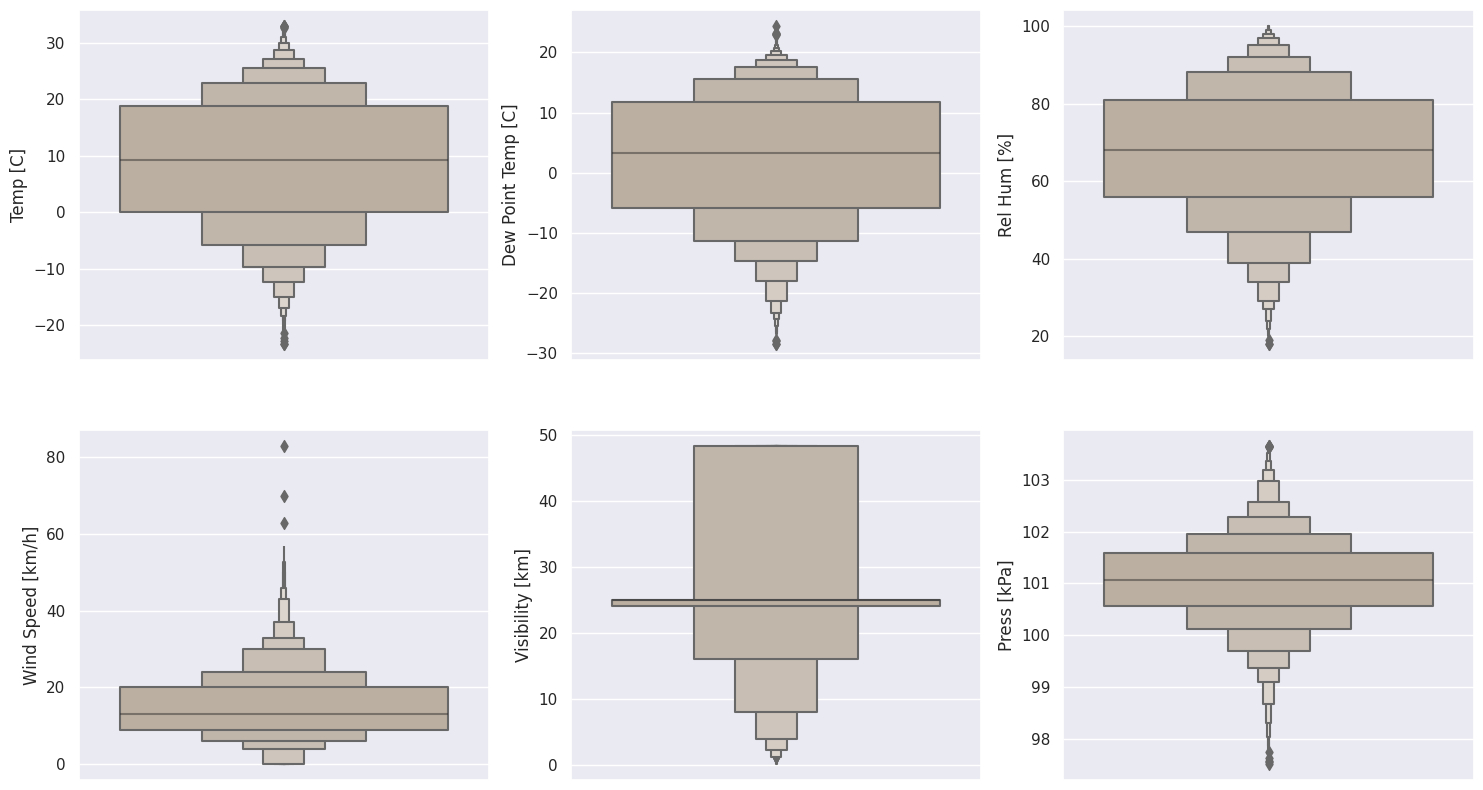

In [12]:
# Basic data visualization
# Display of box charts
plt.figure(figsize = (18, 10))

plt.subplot(231)
sns.boxenplot(data = df, y = 'Temp [C]', color = color_1)

plt.subplot(232)
sns.boxenplot(data = df, y = 'Dew Point Temp [C]', color = color_1)

plt.subplot(233)
sns.boxenplot(data = df, y = 'Rel Hum [%]', color = color_1)

plt.subplot(234)
sns.boxenplot(data = df, y = 'Wind Speed [km/h]', color = color_1)

plt.subplot(235)
sns.boxenplot(data = df, y = 'Visibility [km]', color = color_1)

plt.subplot(236)
sns.boxenplot(data = df, y = 'Press [kPa]', color = color_1)

plt.show()

In [13]:
# Calculation of moving averages of individual measurement parameters
for column in df[weather_measurement_data]:
    df['SMA168 ' + column] = df[column].rolling('168h', center = True).mean()

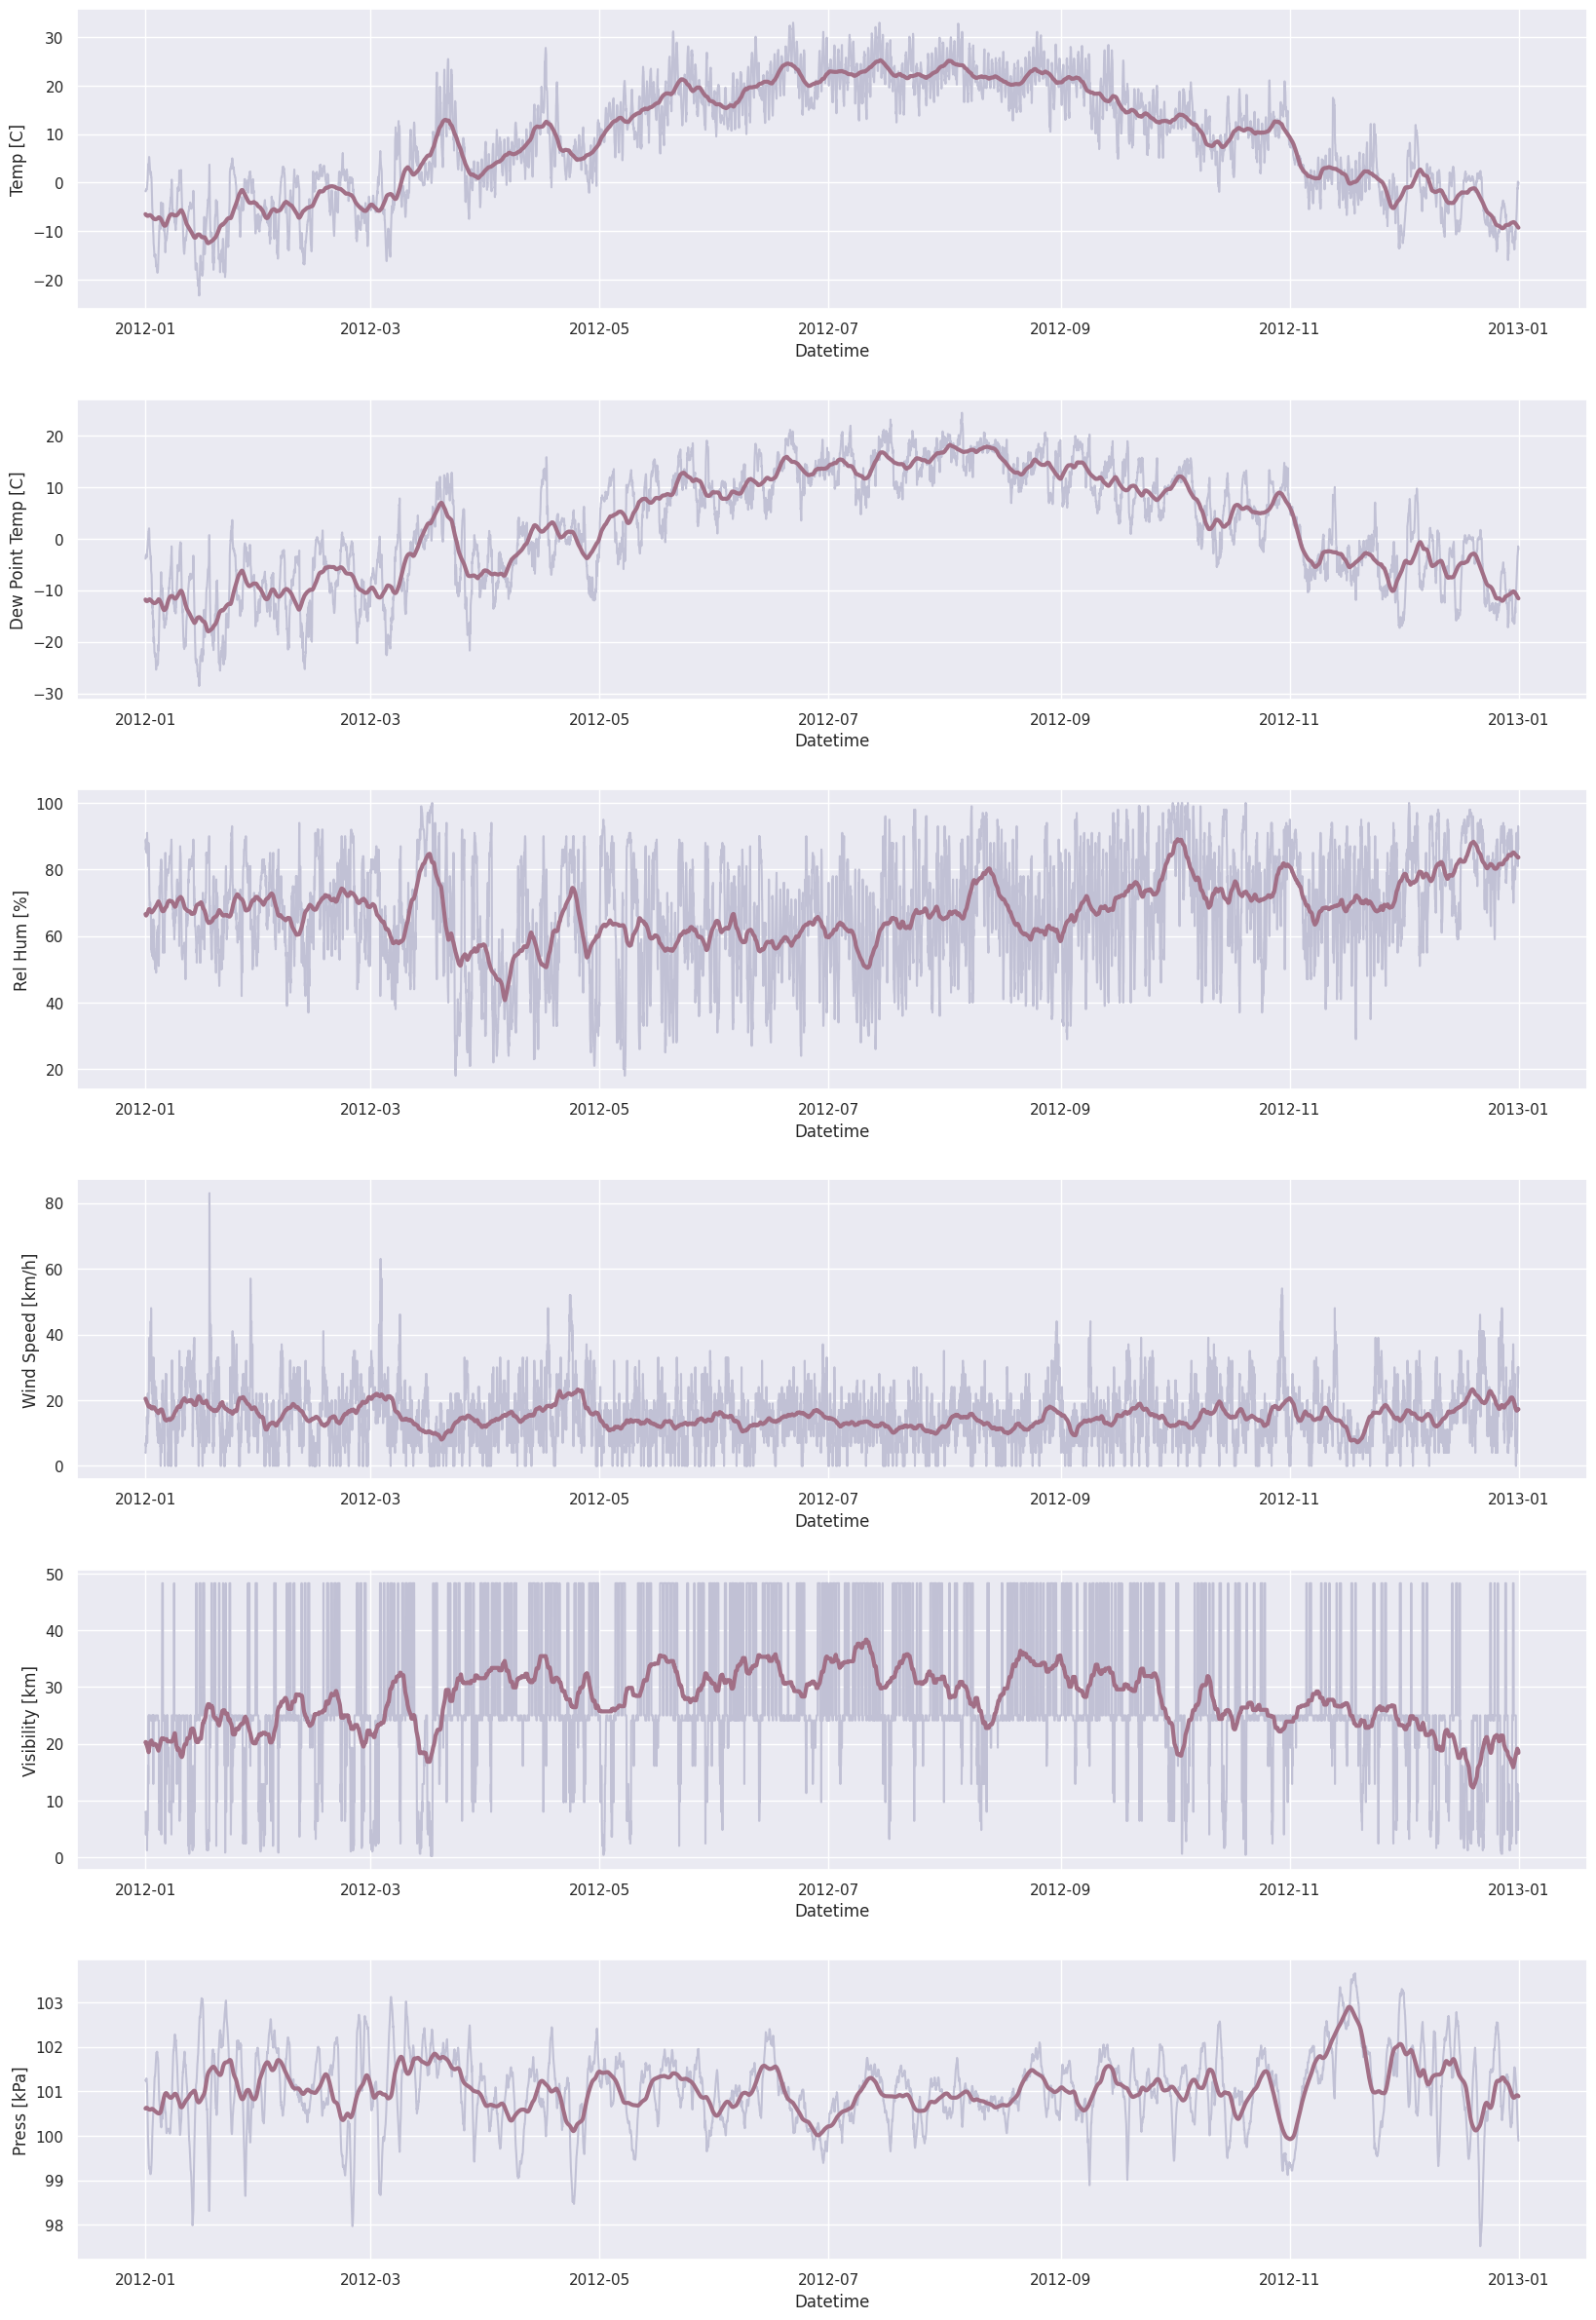

In [14]:
# Display line graphs
plt.figure(figsize = (20, 30))

plt.subplot(611)
sns.lineplot(data = df, x = 'Datetime', y = 'Temp [C]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Temp [C]', color = color_3, lw = 3)

plt.subplot(612)
sns.lineplot(data = df, x = 'Datetime', y = 'Dew Point Temp [C]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Dew Point Temp [C]', color = color_3, lw = 3)

plt.subplot(613)
sns.lineplot(data = df, x = 'Datetime', y = 'Rel Hum [%]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Rel Hum [%]', color = color_3, lw = 3)

plt.subplot(614)
sns.lineplot(data = df, x = 'Datetime', y = 'Wind Speed [km/h]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Wind Speed [km/h]', color = color_3, lw = 3)

plt.subplot(615)
sns.lineplot(data = df, x = 'Datetime', y = 'Visibility [km]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Visibility [km]', color = color_3, lw = 3)

plt.subplot(616)
sns.lineplot(data = df, x = 'Datetime', y = 'Press [kPa]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Press [kPa]', color = color_3, lw = 3)

plt.subplots_adjust(hspace = 0.3)
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [16]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

param_ml_input = ['Datetime (month)', 'Datetime (day)', 'Datetime (hour)', 'Temp [C]', 'Rel Hum [%]', 'Press [kPa]', 'Fog', 'Rain', 'Snow']
param_ml_output = 'Visibility [km]'

In [17]:
X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 1/3)

In [18]:
scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

In [21]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                       'Value predicted by the model (y_pred)': y_pred,
                       'Difference': abs(y_pred - y_test)})
result.head()

,Actual value (y_test),Value predicted by the model (y_pred),Difference
Datetime,,,
2012-10-24 20:00:00,25.0,28.609019,3.609019
2012-05-26 16:00:00,24.1,43.067374,18.967374
2012-09-16 23:00:00,25.0,21.479241,3.520759
2012-08-12 11:00:00,48.3,30.023869,18.276131
2012-12-05 07:00:00,25.0,26.342973,1.342973


In [22]:
result.describe()[result.describe().index != 'count']

,Actual value (y_test),Value predicted by the model (y_pred),Difference
mean,27.482377,27.535074,5.308262
std,12.529836,10.369401,5.121997
min,0.200000,0.471448,0.000067
25%,24.100000,22.345345,1.495695
50%,25.000000,26.266893,3.546375
75%,25.000000,33.602550,7.507661
max,48.300000,54.748165,30.673291


In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfr = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)

In [25]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                       'Value predicted by the model (y_pred)': y_pred,
                       'Difference': abs(y_pred - y_test)})
result.head()

,Actual value (y_test),Value predicted by the model (y_pred),Difference
Datetime,,,
2012-10-24 20:00:00,25.0,26.613,1.613
2012-05-26 16:00:00,24.1,33.114,9.014
2012-09-16 23:00:00,25.0,25.000,0.000
2012-08-12 11:00:00,48.3,35.428,12.872
2012-12-05 07:00:00,25.0,27.336,2.336


In [26]:
result.describe()[result.describe().index != 'count']

,Actual value (y_test),Value predicted by the model (y_pred),Difference
mean,27.482377,27.784890,3.841769
std,12.529836,10.809777,5.046973
min,0.200000,0.701000,0.000000
25%,24.100000,23.982500,0.233750
50%,25.000000,25.224000,1.730500
75%,25.000000,34.022000,5.516750
max,48.300000,48.300000,30.134000


In [27]:
date_set = '2012-06-01 14:00:00'

X_data_summary = df[param_ml_input][df.index == date_set]
y_data_summary = df[param_ml_output][df.index == date_set]

In [28]:
print('For the selected date -', date_set, '- the actual visibility measurement was', y_data_summary[0])
print('The predicted value according to the model #1 (neural network) is', mlp.predict(scaler.transform(X_data_summary))[0])
print('The predicted value according to the model #2 (random forest) is', rfr.predict(scaler.transform(X_data_summary))[0])
print()
print('The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.')

For the selected date - 2012-06-01 14:00:00 - the actual visibility measurement was 48.3
The predicted value according to the model #1 (neural network) is 48.71157861430021
The predicted value according to the model #2 (random forest) is 48.30000000000008

The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.
